# Лабораторная работа №8. Сверточные нейронные сети (CNN). Компьютерное зрение. Задача классификации изображений


ЗАДАНИЕ №1.
1. Загрузите датасет для классификации кошек и собак: https://drive.google.com/file/d/1YQ2PX-BZ_7uZ216qmAnx-nTCaEqozuCZ/view?usp=share_link.
2. Выполните как минимум две аугментации.
3. Соберите CNN с помощью фреймворка Tensorflow и решите задачу классификации кошек и собак. Выполните оценку модели.
4. Сформулируйте вывод на основе ответов следующих вопросов:
o Какие этапы предварительной обработки данных Вы делаете и что происходит с данными?
o Что означают параметры, которые Вы задаете?
o Какие слои есть в Вашей реализации CNN и что происходит на каждом слое?


ЗАДАНИЕ №2.
1. Загрузите датасет с множеством различных классов: https://data.caltech.edu/records/mzrjq-6wc02/files/caltech-101.zip Выберите 3 любых класса, которые Вам нравятся. Загрузите данные и сформируете датасет.
2. Выполните как минимум две аугментации.
3. С помощью фреймворка Tensorflow загрузите модели InceptionV3 и VGG19. Выполните Transfer Learning и Fine-Tuning этих моделей для распознавания классов. В процессе подготовки CNN, разморозьте какой-либо еще слой, кроме последнего. Сравните ре-зультаты двух моделей CNN на Ваших данных (по метрике accuracy в процессе обучения).
4. Реализуйте сверточный слой (прямое и обратное распространение). Используйте реализацию многослойного персептрона из ЛР №7. Соберите CNN, используя разработанные Вами слои.
5. Попробуйте обучить классификатор кошек и собак с использованием собственной реализации CNN.


ЗАДАНИЕ №3**
Реализуйте слои MaxPooling, AveragePooling и MinPooling (прямое и обратное распространение). Самостоятельно найдите схему вычисления градиента.

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

import os
import shutil
from PIL import Image
import splitfolders
from tensorflow.keras.applications import InceptionV3, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

import warnings
warnings.filterwarnings('ignore')

# Задание №1

In [28]:
dataset_path = 'C:/Users/бумбурурик)/Desktop/ML/8ML/data'

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    dataset_path + '/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    dataset_path + '/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [31]:
# Define the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [33]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Результаты модели 
cnn_model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
50/50 [==============================] - 58s 1s/step - loss: 0.6956 - accuracy: 0.5013 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/20
50/50 [==============================] - 57s 1s/step - loss: 0.6936 - accuracy: 0.4994 - val_loss: 0.6927 - val_accuracy: 0.5075
Epoch 3/20
50/50 [==============================] - 58s 1s/step - loss: 0.6933 - accuracy: 0.4931 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 4/20
50/50 [==============================] - 57s 1s/step - loss: 0.6943 - accuracy: 0.5063 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 5/20
50/50 [==============================] - 56s 1s/step - loss: 0.6938 - accuracy: 0.5100 - val_loss: 0.6929 - val_accuracy: 0.5075
Epoch 6/20
50/50 [==============================] - 56s 1s/step - loss: 0.6921 - accuracy: 0.5394 - val_loss: 0.6920 - val_accuracy: 0.5200
Epoch 7/20
50/50 [==============================] - 51s 1s/step - loss: 0.6828 - accuracy: 0.5250 - val_loss: 0.6999 - val_accuracy: 0.5200
Epoch 8/20
50/50 [==

In [35]:
test_loss, test_acc = cnn_model.evaluate(test_generator)
print("Точность на тестовых данных:", test_acc)

13/13 [==============================] - 4s 273ms/step - loss: 0.6216 - accuracy: 0.6925
Точность на тестовых данных: 0.6924999952316284


1/1 [==============================] - 1s 516ms/step


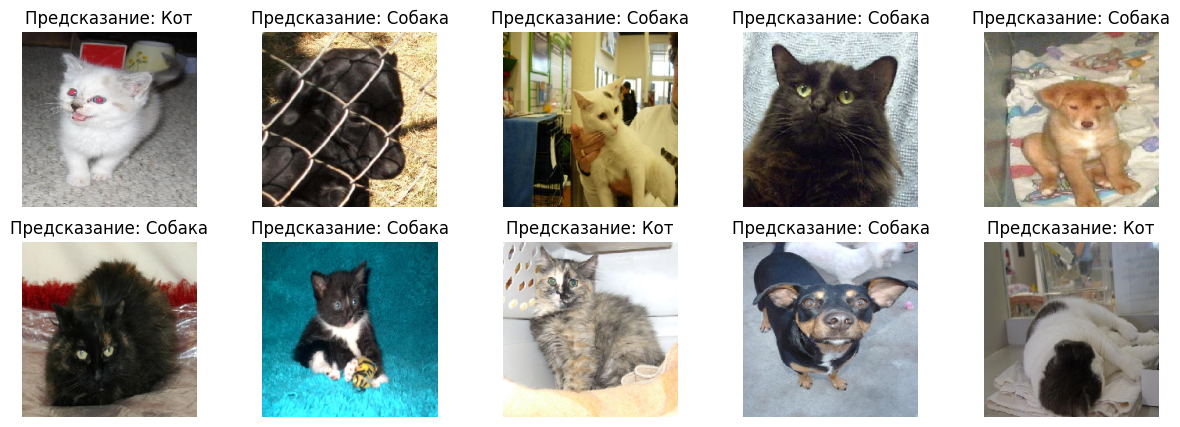

In [36]:
images, labels = next(test_generator)
predictions = cnn_model.predict(images)
predicted_classes = np.round(predictions)
class_labels = ["Кот" if label == 0 else "Собака" for label in predicted_classes]

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Предсказание: {class_labels[i]}")
    plt.axis("off")
plt.show()

1. **Предварительная обработка данных:**
    a. **Масштабирование:** Используется преобразование каждого пикселя изображения для нормализации данных.
    **Аугментация данных:** Применяются случайные трансформации, такие как сдвиг, масштабирование и отражение, для улучшения обобщающей способности модели.

    b. **Генерация данных:** Создаются генераторы для обучающего и тестового наборов, задаются параметры, такие как размер изображений и размер партии (batch size).

2. **Параметры:**
    - **Target Size (224, 224):** Размер, до которого все изображения масштабируются.
    - **Batch Size (32):** Количество обучающих примеров в одной итерации.
    - **Class Mode ('binary'):** Режим классификации, в данном случае - бинарный (два класса).

3. **Слои и их функции в CNN:**
    a. **Слои Conv2D:** Используются для свертки и извлечения признаков из изображений.

    b. **MaxPooling2D:** Уменьшают размерность данных, сохраняя важные признаки.

    c. **Flatten:** Преобразует карты признаков в одномерный вектор для передачи данных в полносвязные слои.

    d. **Dense:** Полносвязные слои для классификации, сигмоидная активация для бинарной классификации.

    e. **Dropout (0.5):** Слой исключения, предотвращающий переобучение.

4. **Обучение:**
    Используется метод `fit` для обучения модели с использованием обучающего генератора данных. Задаются число эпох и валидационные данные для оценки производительности модели. 

5. **Оптимизация и оценка:**
    - **Оптимизатор ('adam'):** Метод регулировки весов в сети.
    - **Функция потерь ('binary_crossentropy'):** Оценка различия между предсказаниями и реальными метками в бинарной классификации.
    - **Метрика ('accuracy'):** Оценка доли правильных ответов модели.

# Задание №2

In [41]:
extract_path = 'C:/Users/бумбурурик)/Desktop/ML/8ML/caltech-101'

In [42]:
selected_classes = ['Motorbikes', 'panda', 'revolver']

In [43]:
dataset_path = 'C:/Users/бумбурурик)/Desktop/ML/8ML/caltech-101/101_ObjectCategories/101_ObjectCategories/'

In [44]:
new_dataset_path = 'C:/Users/бумбурурик)/Desktop/ML/8ML/caltech-101/101_ObjectCategories/selected_classes/'

In [45]:
os.makedirs(new_dataset_path, exist_ok=True)

In [51]:
output_path = 'C:/Users/бумбурурик)/Desktop/ML/8ML/caltech-101/caltech-101/dataset_split'
splitfolders.ratio(new_dataset_path, output=output_path, seed=42, ratio=(0.8, 0.2))
train_path = os.path.join(output_path, 'train')
val_path = os.path.join(output_path, 'val')
print(f'Training data is in: {train_path}')
print(f'Validation data is in: {val_path}')

Copying files: 918 files [00:01, 693.88 files/s]

Training data is in: C:/Users/бумбурурик)/Desktop/ML/8ML/caltech-101/caltech-101/dataset_split\train
Validation data is in: C:/Users/бумбурурик)/Desktop/ML/8ML/caltech-101/caltech-101/dataset_split\val


In [53]:
train_gen = train_datagen.flow_from_directory(
    directory='C:/Users/бумбурурик)/Desktop/ML/8ML/caltech-101/caltech-101/dataset_split/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

val_gen = test_datagen.flow_from_directory(
    directory='C:/Users/бумбурурик)/Desktop/ML/8ML/caltech-101/caltech-101/dataset_split/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 733 images belonging to 3 classes.


Found 185 images belonging to 3 classes.


In [54]:
train_aug = ImageDataGenerator(rescale=1./255,
                              horizontal_flip=True,
                              rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2)

test_aug = ImageDataGenerator(rescale=1./255)

In [55]:
base_model = InceptionV3(weights='imagenet', include_top=False,
                         input_shape=(150, 150, 3))

87910968/87910968 [==============================] - 7s 0us/step


Разморозка промежуточных слоёв


In [56]:
for layer in base_model.layers[:-5]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)

VGG19

In [57]:
base_model = VGG19(weights='imagenet', include_top=False,
                   input_shape=(150, 150, 3))

for layer in base_model.layers[:-4]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)

80134624/80134624 [==============================] - 6s 0us/step


In [58]:
# Обучение
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
inception_history = inception_model.fit(train_gen,
                                        epochs=10,
                                        validation_data=val_gen)

Epoch 1/10
23/23 [==============================] - 28s 960ms/step - loss: 1.0120 - accuracy: 0.9236 - val_loss: 0.2317 - val_accuracy: 0.9514
Epoch 2/10
23/23 [==============================] - 13s 567ms/step - loss: 0.0802 - accuracy: 0.9864 - val_loss: 0.0116 - val_accuracy: 0.9946
Epoch 3/10
23/23 [==============================] - 12s 514ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 6.6871e-04 - val_accuracy: 1.0000
Epoch 4/10
23/23 [==============================] - 13s 558ms/step - loss: 0.0020 - accuracy: 0.9986 - val_loss: 6.0093e-05 - val_accuracy: 1.0000
Epoch 5/10
23/23 [==============================] - 12s 534ms/step - loss: 0.0149 - accuracy: 0.9973 - val_loss: 1.1260e-04 - val_accuracy: 1.0000
Epoch 6/10
23/23 [==============================] - 12s 522ms/step - loss: 1.8730e-04 - accuracy: 1.0000 - val_loss: 3.8311e-05 - val_accuracy: 1.0000
Epoch 7/10
23/23 [==============================] - 13s 543ms/step - loss: 3.7479e-04 - accuracy: 1.0000 - val_loss: 1.384

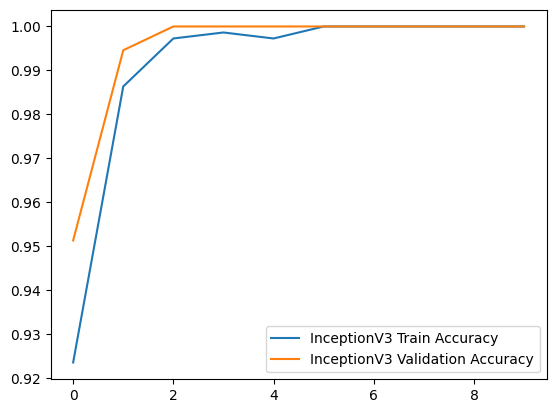

In [60]:
plt.plot(inception_history.history['accuracy'], label='InceptionV3 Train Accuracy')
plt.plot(inception_history.history['val_accuracy'], label='InceptionV3 Validation Accuracy')
plt.legend()
plt.show()

In [61]:
vgg_history = vgg_model.fit(train_gen,
                           epochs=10,
                           validation_data=val_gen)

Copying files: 0 files [22:23, ? files/s]

Epoch 1/10


23/23 [==============================] - 62s 3s/step - loss: 0.8388 - accuracy: 0.7899 - val_loss: 0.1774 - val_accuracy: 0.8649
Epoch 2/10
23/23 [==============================] - 58s 3s/step - loss: 0.1477 - accuracy: 0.9304 - val_loss: 0.0962 - val_accuracy: 0.9568
Epoch 3/10
23/23 [==============================] - 59s 3s/step - loss: 0.1228 - accuracy: 0.9441 - val_loss: 0.1491 - val_accuracy: 0.9514
Epoch 4/10
23/23 [==============================] - 57s 2s/step - loss: 0.1218 - accuracy: 0.9495 - val_loss: 0.0521 - val_accuracy: 0.9622
Epoch 5/10
23/23 [==============================] - 48s 2s/step - loss: 0.0879 - accuracy: 0.9700 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 6/10
23/23 [==============================] - 48s 2s/step - loss: 0.0393 - accuracy: 0.9945 - val_loss: 0.0280 - val_accuracy: 0.9892
Epoch 7/10
23/23 [==============================] - 47s 2s/step - loss: 0.0942 - accuracy: 0.9823 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 8/10
23/23 [=============

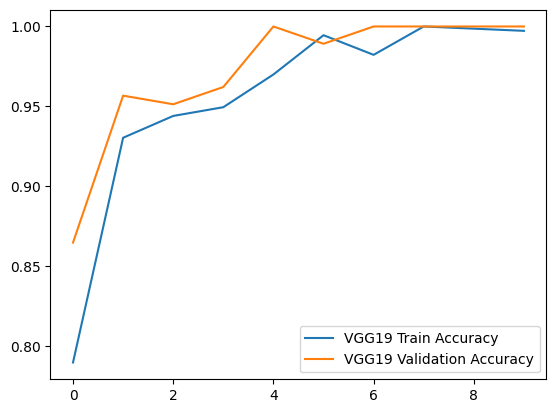

In [62]:
plt.plot(vgg_history.history['accuracy'], label='VGG19 Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.legend()
plt.show()